# cdasws Data Retrieval Example Jupyter Notebook
This [Jupyter notebook](https://jupyter.org) demonstrates using the [cdasws](https://pypi.org/project/cdasws) Python package to retrieve data from [cdaweb](https://cdaweb.gsfc.nasa.gov) in multiple different data models.  The data models demonstrated include the [SpacePy data model](https://spacepy.github.io/datamodel.html), [xarray.Dataset](https://docs.xarray.dev/en/stable/generated/xarray.Dataset.html), and [Pandas DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html).  This notebook contains the following sections:

1. [Prerequisites](#Prerequisites)
1. [Setup](#Setup)
1. [Get Datasets](#Get-Datasets)
1. [Get Dataset Variables](#Get-Dataset-Variables)
1. [Get Data](#Get-Data)
    1. [SpacePy DataModel](#SpacePy-Get-Data)
        1. [Display Metadata](#SpacePy-Display-Metadata)
        2. [Plot Values](#SpacePy-Plot-Values)
    1. [xarray.Dataset](#xarray-Get-Data)
        1. [Display Metadata](#xarray-Display-Metadata)
        2. [Plot Values](#xarray-Plot-Values)
    1. [Pandas DataFrame](#Pandas-DataFrame-Get-Data)
        1. [Display Metadata](#DataFrame-Display-Metadata)
        2. [Plot Values](#DataFrame-Plot-Values)
1. [Additional Documentation](#Additional-Documentation)

## Prerequisites
Install the prerequisite software from the [Python Package Index](https://pypi.org/).

1. pip install cdasws

#### For data in the SpacePy data model

1. pip install spacepy

#### For data in an xarray.Dataset or Pandas DataFrame

1. pip install cdflib xarray

## Setup
Execute some preliminary code that is necessary before the code that follows.

In [1]:
from datetime import datetime

from cdasws import CdasWs, TimeInterval
from cdasws.datarepresentation import DataRepresentation as dr

from IPython.core.display import HTML
import matplotlib.pyplot as plt

cdas = CdasWs()
# limit display of long lists
DISP_LIMIT = 5

today = datetime.now().strftime('%Y-%B-%d')

def display_link(
    url: str,
    text: str) -> None:
    display(HTML(f'<a href="{url}" target="_blank">{text}</a>'))

## Get Datasets
The following code demontrates how to get a list of datasets.

In [2]:
datasets = cdas.get_datasets(observatoryGroup='ACE',
                             instrumentType='Magnetic Fields (space)')
for index, dataset in enumerate(datasets):
    dataset_id = dataset["Id"]
    dataset_label = dataset["Label"]
    print(f'{index}. {dataset_id}, {dataset_label}')
    if 'AC_H3_MFI' in dataset_id:  # select this dataset for use below
        print('...')
        print(f'{len(datasets) - 1}. {datasets[-1]["Id"]}, {datasets[-1]["Label"]}')
        break
#print(dataset)
doi = dataset['Doi']
print(f'\nSelected dataset: {dataset_id} (doi:{doi})')
display_link(dataset['Notes'], 'Notes')
display(HTML(f'<b>Data Citation</b>: {cdas.get_citation(doi)}.  Accessed on {today}.'))

0. AC_AT_DEF, ACE Hourly RTN, GSE and J2000 GCI Attitude direction cosines - E. C. Stone (California Institute of Technology)
1. AC_H0_MFI, H0 - ACE Magnetic Field 16-Second Level 2 Data - N. Ness (Bartol Research Institute)
2. AC_H1_MFI, H1 - ACE Magnetic Field 4-Minute Level 2 Data - N. Ness (Bartol Research Institute)
3. AC_H2_MFI, H2 - ACE Magnetic Field 1-Hour Level 2 Data - N. Ness (Bartol Research Institute)
4. AC_H3_MFI, H3 - ACE Magnetic Field 1-Second Level 2 Data - N. Ness (Bartol Research Institute)
...
15. OMNI_HRO_5MIN, OMNI Combined, Definitive, 5-minute IMF and Plasma, and Energetic Proton Fluxes, Time-Shifted to the Nose  of the Earth's Bow Shock, plus Magnetic Indices - J.H. King, N. Papatashvilli (AdnetSystems, NASA GSFC)

Selected dataset: AC_H3_MFI (doi:10.48322/7xyh-4z44)


## Get Dataset Variables
The following code demonstrates how to get a dataset's variables.

In [3]:
variables = cdas.get_variables(doi)
var_names = []
for index, variable in enumerate(variables):
    name = variable['Name']
    var_names.append(name)
    print(f'{index}. {name}, {variable["LongDescription"]}')
time_interval = TimeInterval('2009-06-01T00:00:00Z', '2009-06-01T00:01:00Z')

0. Magnitude, B-field magnitude
1. BRTN, Magnetic Field Vector in RTN coordinates (1 sec)
2. BGSEc, Magnetic Field Vector in GSE Cartesian coordinates (1 sec)
3. BGSM, Magnetic field vector in GSM coordinates (1 sec)


## Get Data
The following code demonstrates how to access data for a selected time range from the selected dataset.  The data is retrieved in the following ways:

1. [SpacePy data model](#SpacePy-Get-Data)
2. [xarray.Dataset](#xarray-Get-Data)
3. [Pandas DataFrame](#Pandas-DataFrame)

You would typically only use one method.  You may choose one over the other if you are integrating this code with other code that expects the data to be organized a specific way or if you have a another reason to prefer a specific data model.

### SpacePy Get Data

The following code demonstrates how to retrieve data into a <a href="https://spacepy.github.io/datamodel.html" target="_blank">SpacePy data model</a>.

In [4]:
_, data = cdas.get_data(doi, var_names, time_interval, dataRepresentation = dr.SPACEPY)
print(data)

{'Epoch': VarCopy([datetime.datetime(2009, 6, 1, 0, 0, 0, 100000),
         datetime.datetime(2009, 6, 1, 0, 0, 1, 100000),
         datetime.datetime(2009, 6, 1, 0, 0, 2, 100000),
         datetime.datetime(2009, 6, 1, 0, 0, 3, 100000),
         datetime.datetime(2009, 6, 1, 0, 0, 4, 100000),
         datetime.datetime(2009, 6, 1, 0, 0, 5, 100000),
         datetime.datetime(2009, 6, 1, 0, 0, 6, 100000),
         datetime.datetime(2009, 6, 1, 0, 0, 7, 100000),
         datetime.datetime(2009, 6, 1, 0, 0, 8, 100000),
         datetime.datetime(2009, 6, 1, 0, 0, 9, 100000),
         datetime.datetime(2009, 6, 1, 0, 0, 10, 100000),
         datetime.datetime(2009, 6, 1, 0, 0, 11, 100000),
         datetime.datetime(2009, 6, 1, 0, 0, 12, 100000),
         datetime.datetime(2009, 6, 1, 0, 0, 13, 100000),
         datetime.datetime(2009, 6, 1, 0, 0, 14, 100000),
         datetime.datetime(2009, 6, 1, 0, 0, 15, 100000),
         datetime.datetime(2009, 6, 1, 0, 0, 16, 100000),
         datet

### SpacePy Display Metadata

The following code displays metadata for the Magnitude variable from the spacepy data model.

In [5]:
print(data[var_names[0]].attrs)

{'FIELDNAM': 'B-field magnitude', 'VALIDMIN': np.float32(0.0), 'VALIDMAX': np.float32(500.0), 'SCALEMIN': np.float32(0.0), 'SCALEMAX': np.float32(10.0), 'UNITS': 'nT', 'FORMAT': 'F8.3', 'VAR_TYPE': 'data', 'DICT_KEY': 'magnetic_field>magnitude', 'FILLVAL': np.float32(-1e+31), 'DEPEND_0': 'Epoch', 'CATDESC': 'B-field magnitude', 'LABLAXIS': '<|B|>', 'DISPLAY_TYPE': 'time_series', 'DIM_SIZES': np.int32(0)}


### SpacePy Plot Values

The following code plots the `Magnitude` variable's values using the label values from the spacepy data model.

/home/btharris/opt/python/39/jupyter/lib64/python3.9/site-packages/spacepy/empiricals.py:26: UserWarning: Qin-Denton/OMNI2 data not found in current format. This module has limited functionality. Run spacepy.toolbox.update(QDomni=True) to download data.
  import spacepy.omni as om


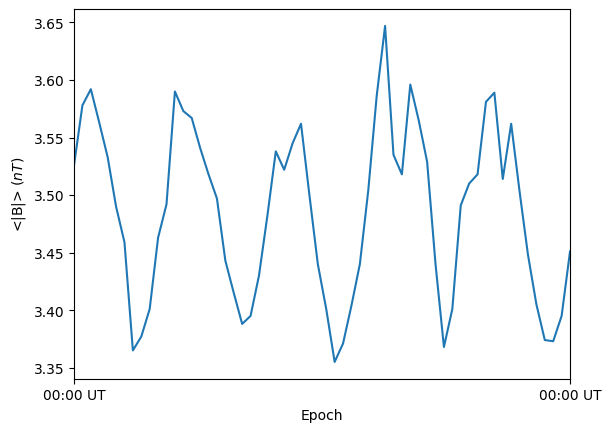

In [6]:
fig = data.plot([var_names[0]])

### xarray Get Data

The following code demonstrates how to retrieve data into an <a href="https://docs.xarray.dev/en/stable/generated/xarray.Dataset.html" target="_blank">xarray.Dataset</a>.

In [7]:
_, data = cdas.get_data(doi, var_names, time_interval, dataRepresentation = dr.XARRAY)
print(data)

<xarray.Dataset> Size: 3kB
Dimensions:    (Epoch: 60, cartesian: 3)
Coordinates:
  * Epoch      (Epoch) datetime64[ns] 480B 2009-06-01T00:00:00.100000 ... 200...
  * cartesian  (cartesian) <U11 132B 'x_component' 'y_component' 'z_component'
    metavar0   (cartesian) <U6 72B 'Br RTN' 'Bt RTN' 'Bn RTN'
    metavar1   (cartesian) <U6 72B 'Bx GSE' 'By GSE' 'Bz GSE'
    metavar2   (cartesian) <U8 96B 'Bx (GSM)' 'By (GSM)' 'Bz (GSM)'
Data variables:
    Magnitude  (Epoch) float32 240B 3.526 3.578 3.592 ... 3.373 3.395 3.451
    BRTN       (Epoch, cartesian) float32 720B 0.339 -2.066 ... -2.313 -2.56
    BGSEc      (Epoch, cartesian) float32 720B -0.342 2.406 ... 2.616 -2.249
    BGSM       (Epoch, cartesian) float32 720B -0.342 3.083 ... 3.187 -1.321
Attributes: (12/29)
    TITLE:                       ['ACE> Magnetometer Parameters']
    Project:                     ['ACE>Advanced Composition Explorer', 'ISTP>...
    Discipline:                  ['Space Physics>Interplanetary Studies']
   

### xarray Display Metadata

The following code displays metadata for the `Magnitude` variable from the `xarray.Dataset`.

In [8]:
print(data[var_names[0]])

<xarray.DataArray 'Magnitude' (Epoch: 60)> Size: 240B
array([3.526, 3.578, 3.592, 3.563, 3.533, 3.49 , 3.459, 3.365, 3.377,
       3.401, 3.463, 3.492, 3.59 , 3.573, 3.567, 3.541, 3.518, 3.497,
       3.443, 3.415, 3.388, 3.395, 3.43 , 3.482, 3.538, 3.522, 3.545,
       3.562, 3.5  , 3.44 , 3.401, 3.355, 3.371, 3.404, 3.44 , 3.504,
       3.586, 3.647, 3.535, 3.518, 3.596, 3.565, 3.529, 3.44 , 3.368,
       3.401, 3.491, 3.51 , 3.518, 3.581, 3.589, 3.514, 3.562, 3.503,
       3.448, 3.405, 3.374, 3.373, 3.395, 3.451], dtype=float32)
Coordinates:
  * Epoch    (Epoch) datetime64[ns] 480B 2009-06-01T00:00:00.100000 ... 2009-...
Attributes: (12/18)
    FIELDNAM:       B-field magnitude
    VALIDMIN:       0.0
    VALIDMAX:       500.0
    SCALEMIN:       0.0
    SCALEMAX:       10.0
    UNITS:          nT
    ...             ...
    LABLAXIS:       <|B|>
    DISPLAY_TYPE:   time_series
    DIM_SIZES:      0
    standard_name:  B-field magnitude
    units:          nT
    long_name:      <|

### xarray Plot Values

The following code plots the `Magnitude` variable's values using the label values from the `xarray.Dataset`.


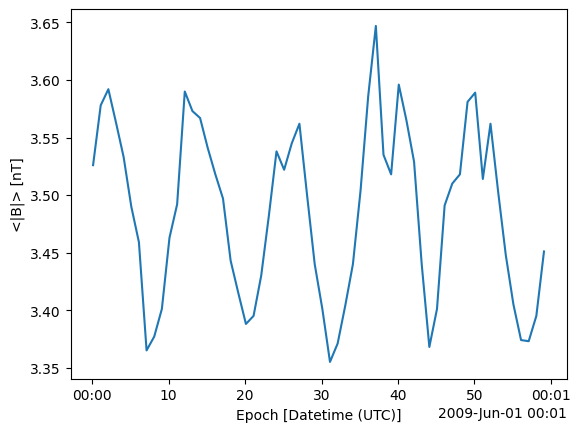

In [9]:
data[var_names[0]].plot()
plt.show()

### Pandas DataFrame Get Data
The following code converts the `Magnitude` portion of the above `xarray.Dataset` to a [Pandas](https://pandas.pydata.org/) [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) and prints the result.  This may be helpful for the case where some existing data analysis software requires the data in a Pandas `DataFrame`.

In [10]:
df = data[var_names[0]].to_dataframe()
print(df)

                         Magnitude
Epoch                             
2009-06-01 00:00:00.100      3.526
2009-06-01 00:00:01.100      3.578
2009-06-01 00:00:02.100      3.592
2009-06-01 00:00:03.100      3.563
2009-06-01 00:00:04.100      3.533
2009-06-01 00:00:05.100      3.490
2009-06-01 00:00:06.100      3.459
2009-06-01 00:00:07.100      3.365
2009-06-01 00:00:08.100      3.377
2009-06-01 00:00:09.100      3.401
2009-06-01 00:00:10.100      3.463
2009-06-01 00:00:11.100      3.492
2009-06-01 00:00:12.100      3.590
2009-06-01 00:00:13.100      3.573
2009-06-01 00:00:14.100      3.567
2009-06-01 00:00:15.100      3.541
2009-06-01 00:00:16.100      3.518
2009-06-01 00:00:17.100      3.497
2009-06-01 00:00:18.100      3.443
2009-06-01 00:00:19.100      3.415
2009-06-01 00:00:20.100      3.388
2009-06-01 00:00:21.100      3.395
2009-06-01 00:00:22.100      3.430
2009-06-01 00:00:23.100      3.482
2009-06-01 00:00:24.100      3.538
2009-06-01 00:00:25.100      3.522
2009-06-01 00:00:26.

### DataFrame Display Metadata
The following code displays the global attributes metadata for the DataFrame.

In [11]:
print(df.attrs)

{}


### DataFrame Plot Values
The following code plots the `DataFrame's` values.

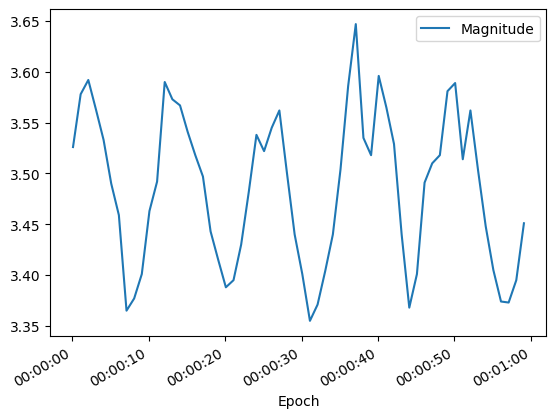

In [12]:
df.plot()
plt.show()

## Additional Documentation

View the [cdasws API](https://cdaweb.gsfc.nasa.gov/WebServices/REST/py/cdasws/) for additional functions.  Additional [notebook examples](https://cdaweb.gsfc.nasa.gov/WebServices/REST/#Jupyter_Notebook_Examples) are also available.